In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winequality-red.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [7]:
df.drop(0,axis=0,inplace=True)

In [5]:
df

,Class label,Alcohol,Malic acid
1,7.4,0.7,0.0
2,7.8,0.88,0.0
3,7.8,0.76,0.04
4,11.2,0.28,0.56
5,7.4,0.7,0.0
...,...,...,...
1595,6.2,0.6,0.08
1596,5.9,0.55,0.1
1597,6.3,0.51,0.13
1598,5.9,0.645,0.12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class label  1599 non-null   object
 1   Alcohol      1599 non-null   object
 2   Malic acid   1599 non-null   object
dtypes: object(3)
memory usage: 37.6+ KB


In [13]:
df['Alcohol'] = pd.to_numeric(df['Alcohol'])
df['Malic acid'] = pd.to_numeric(df['Malic acid'])
df['Class label'] = pd.to_numeric(df['Class label'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  1599 non-null   float64
 1   Alcohol      1599 non-null   float64
 2   Malic acid   1599 non-null   float64
dtypes: float64(3)
memory usage: 37.6 KB


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

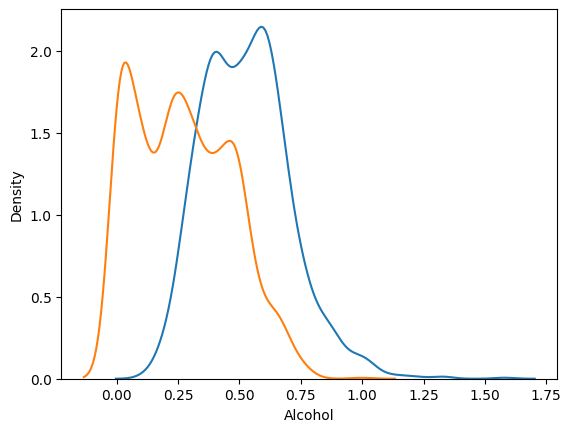

In [15]:
sns.kdeplot(df['Alcohol'])
sns.kdeplot(df['Malic acid'])

In [21]:
df['Class label'].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: Class label, Length: 96, dtype: int64

<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

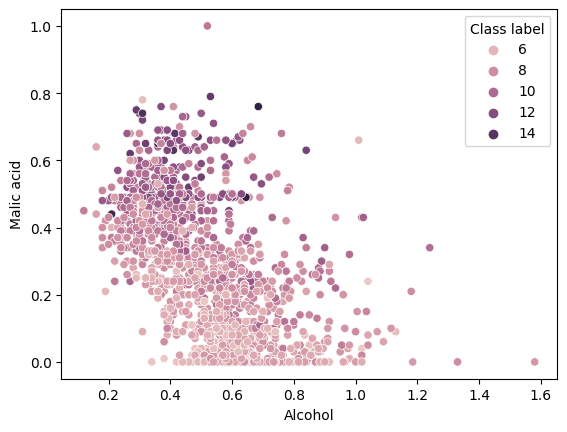

In [22]:
dict_L={6:'red',8:'blue',10:'black',12:'green',14:'yellow'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [25]:
np.round(X_train.describe(), 1)


,Alcohol,Malic acid
count,1119.0,1119.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,0.0
25%,0.4,0.1
50%,0.5,0.3
75%,0.6,0.4
max,1.6,1.0


In [26]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,1119.0,1119.0
mean,0.3,0.3
std,0.1,0.2
min,0.0,0.0
25%,0.2,0.1
50%,0.3,0.3
75%,0.4,0.4
max,1.0,1.0


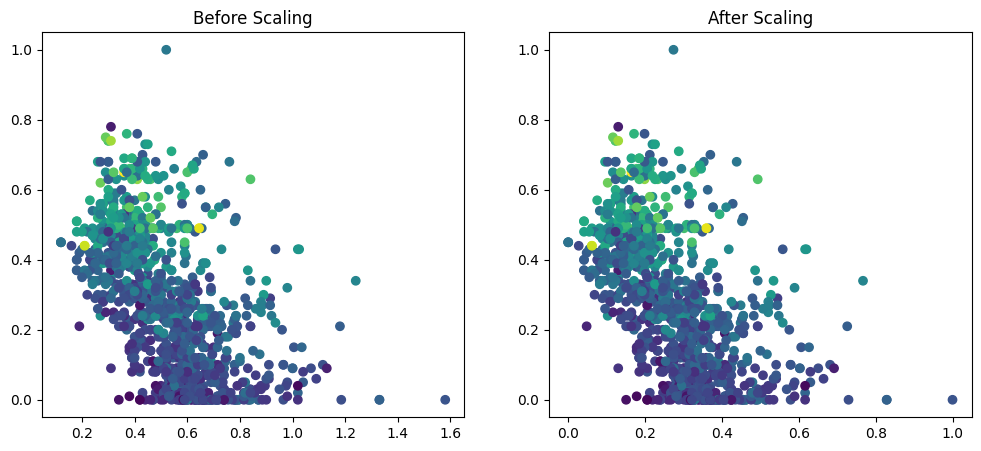

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()


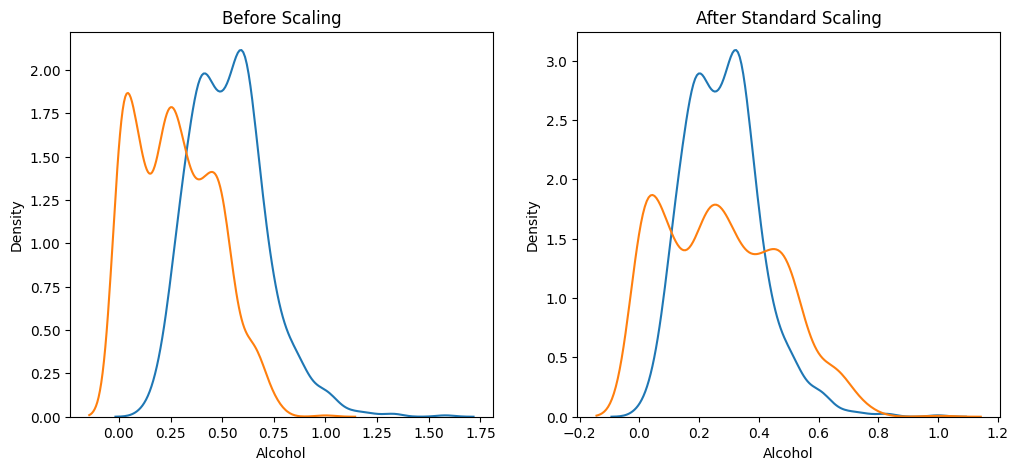

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()
